<center>
<h1> EDA with Data Vizualization for Space X First Stage Landing Prediction
</center>


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting up our data frame
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Visualizating

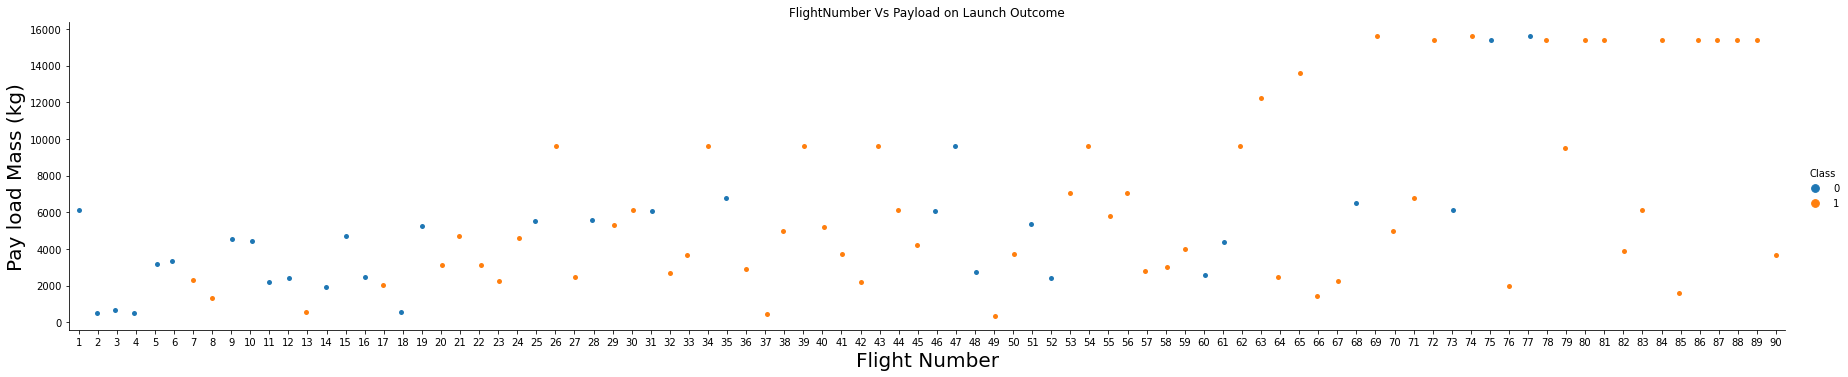

In [3]:
# We examine how Flight Number and Payload affect the launch outcome 
# Visualization of the relationship between Flight Number and Launch Site
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.title('FlightNumber Vs Payload on Launch Outcome')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### **Observation 1** 

Different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

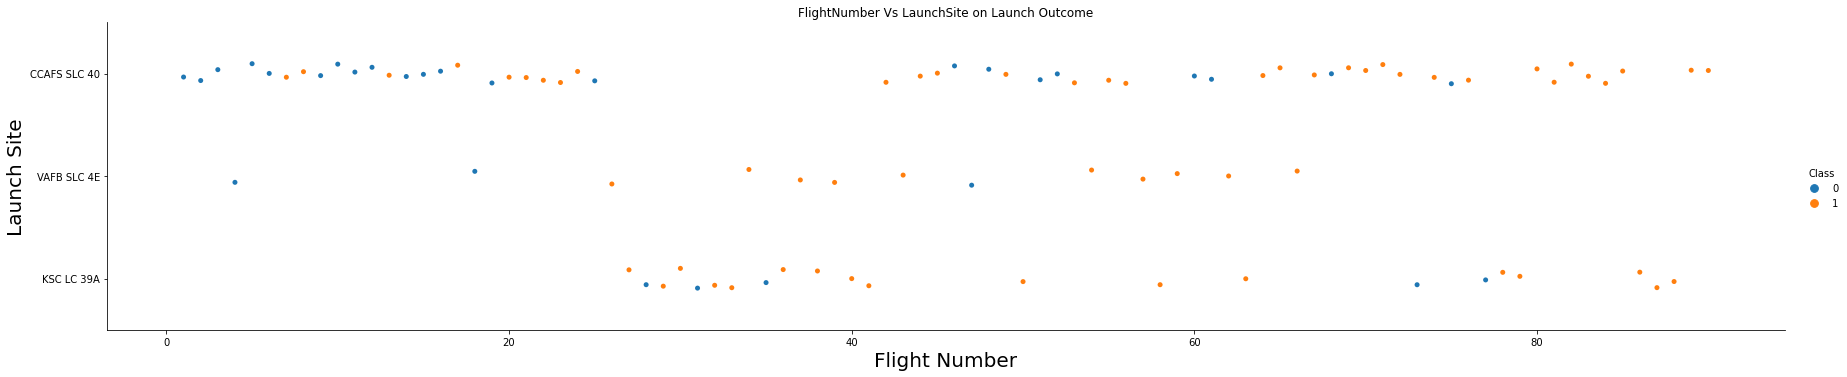

In [10]:
# Visualization of the relationship between Flight Number and Launch Site

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.title('FlightNumber Vs LaunchSite on Launch Outcome')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

#### **Observation 2** 

The most successful launch site is <code>VAFB SLC 4E</code>, with the least ammount of failures compared to their flight numbers.  

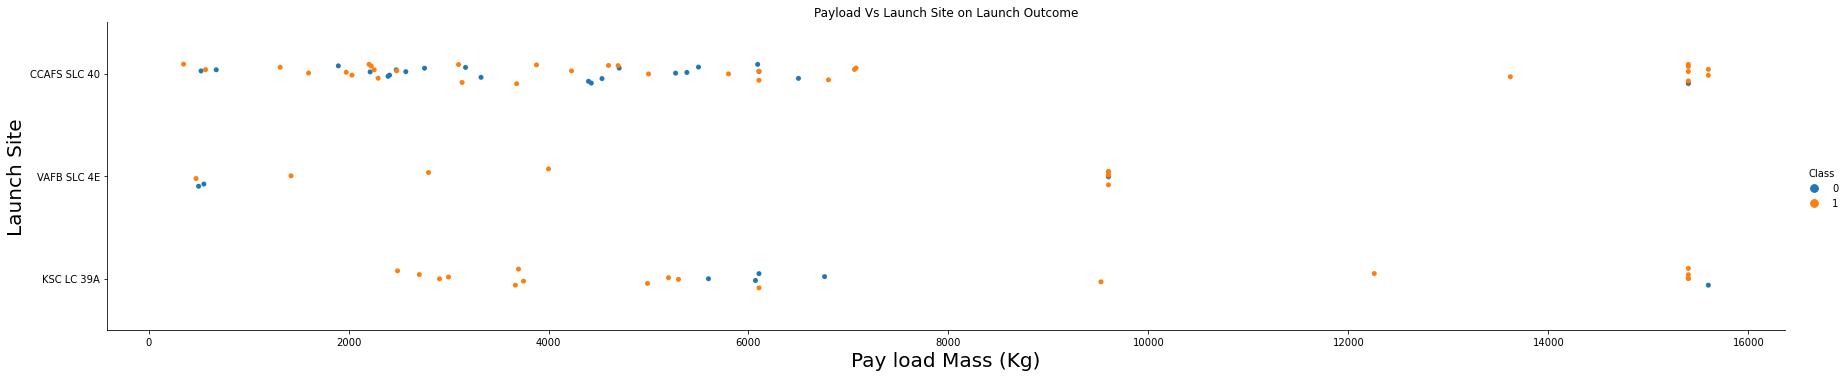

In [4]:
# Visualization of the relationship between Payload and Launch Site

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.title('Payload Vs Launch Site on Launch Outcome')
plt.xlabel("Pay load Mass (Kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

#### **Observation 3**

Launch site seems to have the biggest impact on the outcome, but we notice higher payloads have had much higher success rates. <br>
Observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000)

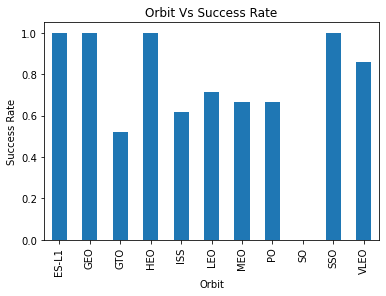

In [12]:
# Visualization of the relationship between success rate of each orbit type

data_bar = df.groupby('Orbit')['Class'].mean()
data_bar.plot(kind='bar')
plt.title('Orbit Vs Success Rate')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.show()

#### Observation

There are 4 Orbitals with a 100% success rate:
* ES-L1: A point between the eart and the sun where the gravitational pulls between two bodies is canceled out. 
* GEO: Geosynchronous orbit around the equator of the earth. 
* HEO: A highly elliptical orbit.
* SSO: Sun synchronous orbit. 

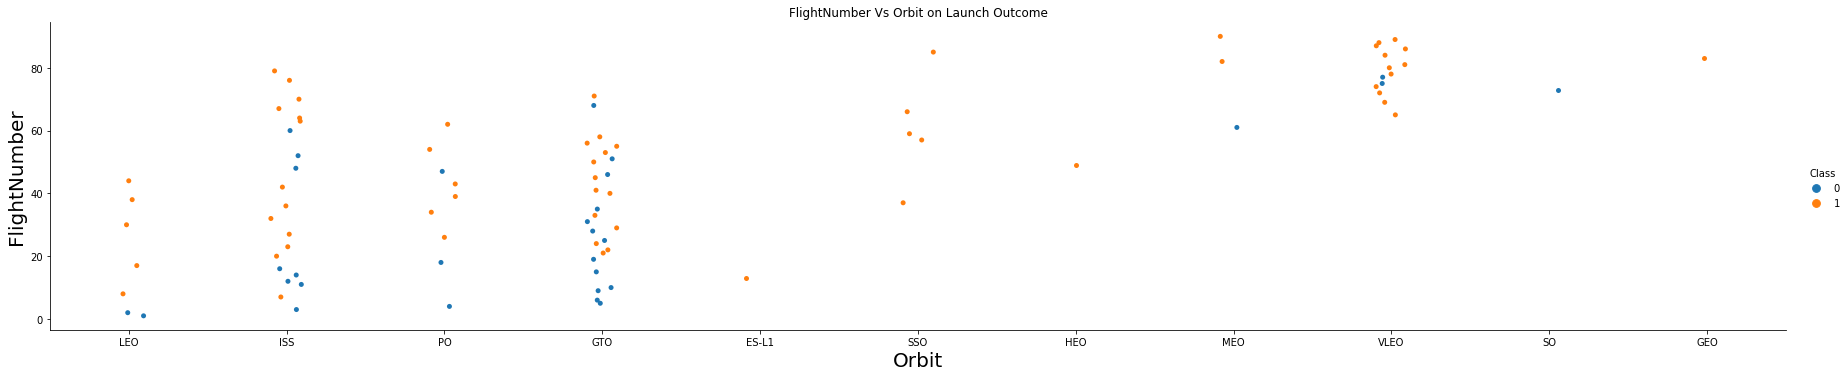

In [14]:
# Visualization of the relationship between FlightNumber and Orbit type

sns.catplot(y="FlightNumber", x="Orbit", hue="Class", data=df, aspect = 5)
plt.title('FlightNumber Vs Orbit on Launch Outcome')
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

#### Observation 4

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

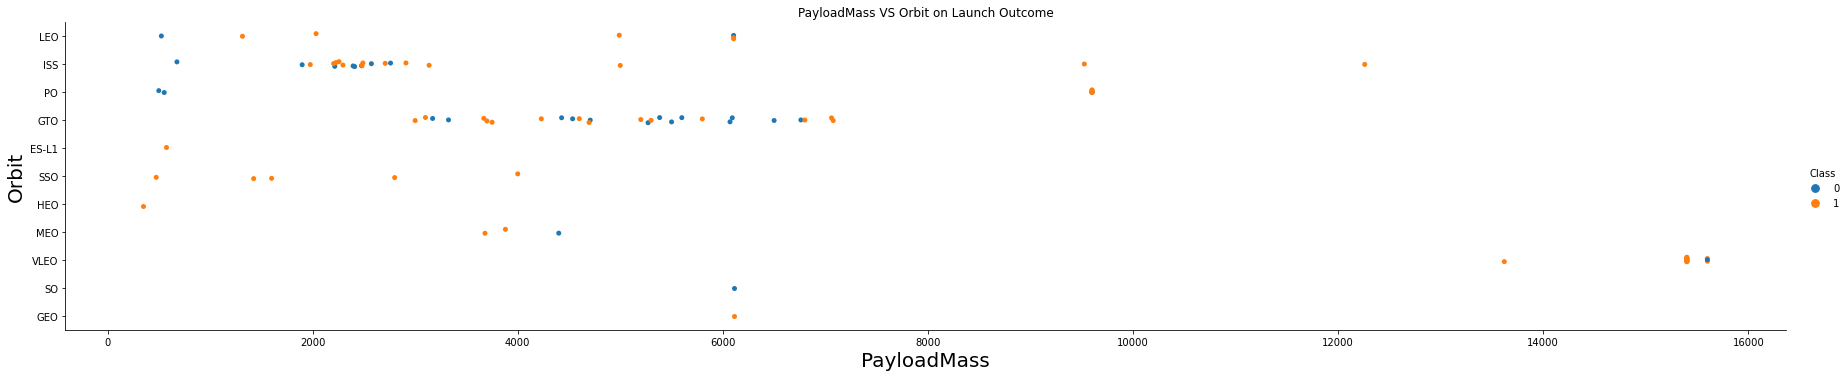

In [16]:
# Visualization of the relationship between Payload and Orbit type

sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.title('PayloadMass VS Orbit on Launch Outcome')
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

#### Observation 5

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


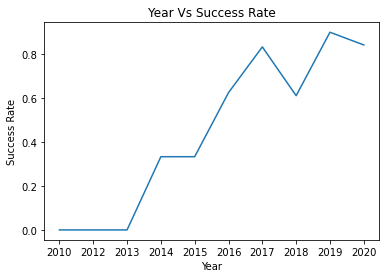

In [17]:
# Visualization of the launch success yearly trend

# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
data_line = df.groupby(Extract_year('Date'))['Class'].mean()

plt.plot(data_line)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Year Vs Success Rate')
plt.show()

## Features Engineering: One Hot Encoding

In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [19]:
# Creating a dummy variables to categorical columns

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Cast all numeric columns to float64

features_one_hot=features_one_hot.astype('float64')

In [21]:
# Exporting to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)